<a href="https://colab.research.google.com/github/MayaJawnPhilly/Misc.-Projects/blob/main/leading_cause_death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

Saving NCHS_-_Leading_Causes_of_Death__United_States.csv to NCHS_-_Leading_Causes_of_Death__United_States.csv
User uploaded file "NCHS_-_Leading_Causes_of_Death__United_States.csv" with length 842709 bytes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [41]:
pd.set_option('display.max_columns', None)

unstacked_df=df.groupby(by=['State','Cause Name'])['Age-adjusted Death Rate'].mean().unstack().reset_index()
unstacked_df

Cause Name,State,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
0,Alabama,962.257895,31.315789,52.510526,194.773684,26.400000,254.447368,21.178947,20.957895,58.115789,13.273684,50.952632
1,Alaska,774.273684,21.700000,43.378947,177.005263,22.105263,161.205263,14.200000,10.568421,47.863158,21.889474,56.878947
2,Arizona,732.915789,31.442105,45.157895,157.289474,21.468421,170.231579,16.652632,8.384211,37.757895,16.678947,49.242105
3,Arkansas,920.400000,26.626316,54.178947,197.426316,26.547368,241.636842,23.800000,19.900000,58.752632,15.410526,48.721053
4,California,691.131579,26.673684,38.647368,160.668421,21.568421,185.468421,19.936842,7.821053,45.836842,9.889474,29.715789
5,Colorado,718.694737,28.900000,50.015789,152.752632,17.194737,150.621053,15.668421,10.289474,41.636842,17.405263,45.163158
6,Connecticut,696.263158,16.352632,33.663158,166.657895,16.384211,175.942105,16.778947,13.152632,35.384211,8.752632,36.178947
7,Delaware,799.710526,20.147368,42.389474,188.510526,22.368421,203.752632,16.468421,15.484211,43.715789,11.447368,40.057895
8,District of Columbia,884.384211,18.521053,24.994737,197.594737,28.647368,247.257895,14.663158,11.810526,39.478947,5.731579,36.789474
9,Florida,726.594737,18.100000,39.642105,169.010526,20.736842,183.368421,11.305263,10.747368,38.784211,13.468421,44.015789


In [42]:
# Calculate the percentage of each cause relative to "All causes" (when using 'Deaths')
for col in unstacked_df.columns:
    if col != 'State' and col != 'All causes':
        unstacked_df[col + '_pct'] = (unstacked_df[col] / unstacked_df['All causes']) * 100

# Display the modified DataFrame
unstacked_df.head()

Cause Name,State,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries,Alzheimer's disease_pct,CLRD_pct,Cancer_pct,Diabetes_pct,Heart disease_pct,Influenza and pneumonia_pct,Kidney disease_pct,Stroke_pct,Suicide_pct,Unintentional injuries_pct
0,Alabama,962.257895,31.315789,52.510526,194.773684,26.400000,254.447368,21.178947,20.957895,58.115789,13.273684,50.952632,3.254407,5.457012,20.241318,2.743547,26.442742,2.200964,2.177991,6.039523,1.379431,5.295112
1,Alaska,774.273684,21.700000,43.378947,177.005263,22.105263,161.205263,14.200000,10.568421,47.863158,21.889474,56.878947,2.802627,5.602534,22.860814,2.854968,20.820191,1.833977,1.364946,6.181685,2.827098,7.346104
2,Arizona,732.915789,31.442105,45.157895,157.289474,21.468421,170.231579,16.652632,8.384211,37.757895,16.678947,49.242105,4.290002,6.161403,21.460784,2.929180,23.226622,2.272107,1.143953,5.151737,2.275698,6.718658
3,Arkansas,920.400000,26.626316,54.178947,197.426316,26.547368,241.636842,23.800000,19.900000,58.752632,15.410526,48.721053,2.892907,5.886457,21.450056,2.884329,26.253460,2.585832,2.162103,6.383380,1.674329,5.293465
4,California,691.131579,26.673684,38.647368,160.668421,21.568421,185.468421,19.936842,7.821053,45.836842,9.889474,29.715789,3.859422,5.591897,23.247154,3.120740,26.835472,2.884667,1.131630,6.632144,1.430910,4.299585


In [43]:
unstacked_df['State_abbr']=unstacked_df['State'].map(
 {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
})
unstacked_df.head()

Cause Name,State,All causes,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries,Alzheimer's disease_pct,CLRD_pct,Cancer_pct,Diabetes_pct,Heart disease_pct,Influenza and pneumonia_pct,Kidney disease_pct,Stroke_pct,Suicide_pct,Unintentional injuries_pct,State_abbr
0,Alabama,962.257895,31.315789,52.510526,194.773684,26.400000,254.447368,21.178947,20.957895,58.115789,13.273684,50.952632,3.254407,5.457012,20.241318,2.743547,26.442742,2.200964,2.177991,6.039523,1.379431,5.295112,AL
1,Alaska,774.273684,21.700000,43.378947,177.005263,22.105263,161.205263,14.200000,10.568421,47.863158,21.889474,56.878947,2.802627,5.602534,22.860814,2.854968,20.820191,1.833977,1.364946,6.181685,2.827098,7.346104,AK
2,Arizona,732.915789,31.442105,45.157895,157.289474,21.468421,170.231579,16.652632,8.384211,37.757895,16.678947,49.242105,4.290002,6.161403,21.460784,2.929180,23.226622,2.272107,1.143953,5.151737,2.275698,6.718658,AZ
3,Arkansas,920.400000,26.626316,54.178947,197.426316,26.547368,241.636842,23.800000,19.900000,58.752632,15.410526,48.721053,2.892907,5.886457,21.450056,2.884329,26.253460,2.585832,2.162103,6.383380,1.674329,5.293465,AR
4,California,691.131579,26.673684,38.647368,160.668421,21.568421,185.468421,19.936842,7.821053,45.836842,9.889474,29.715789,3.859422,5.591897,23.247154,3.120740,26.835472,2.884667,1.131630,6.632144,1.430910,4.299585,CA


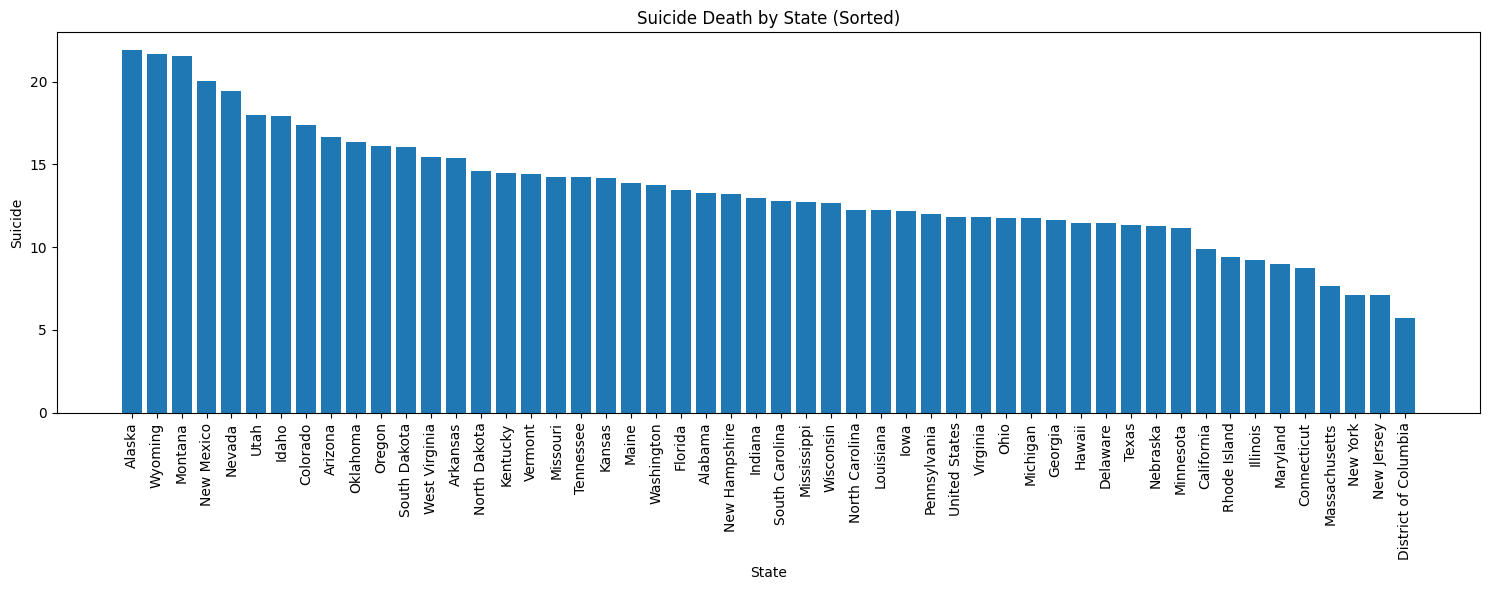

In [44]:
# prompt: Could you create a a chart that shows 'Suicide_pct' by state? I would like it sorted by the value in descending order

import matplotlib.pyplot as plt

# Sort the DataFrame by 'Suicide_pct' in descending order
unstacked_df_sorted = unstacked_df.sort_values(by='Suicide', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size for better readability
plt.bar(unstacked_df_sorted['State'], unstacked_df_sorted['Suicide'])
plt.xlabel('State')
plt.ylabel('Suicide')
plt.title('Suicide Death by State (Sorted)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [47]:
import plotly.express as px

fig = px.choropleth(unstacked_df,
                    locations='State_abbr',
                    locationmode="USA-states",
                    scope="usa",
                    color='Suicide',
                    color_continuous_scale="sunset_r",
                    title='Suicide (age-adjusted) by State')
fig.show()